In [1]:
import sys
sys.path.append("../../../")

## 数据

In [2]:
from pylib.utils.functions_for_regression import lin_data, plot_scatter
import matplotlib.pyplot as plt
import numpy as np

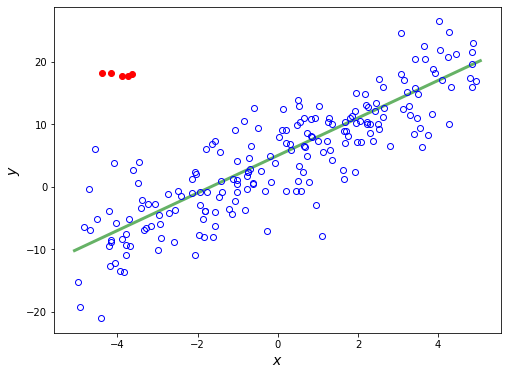

In [3]:
X, y, _, f_truth, outliers = lin_data(200, has_outlier=True)

plt.figure(figsize=(8, 6))
plot_scatter(X, y, f=f_truth)
plt.scatter(outliers[:, 0], outliers[:, 1], color='r')
plt.show()

In [4]:
X_ol = np.r_[X, outliers[:, 0].reshape(-1, 1)]
y_ol = np.r_[y, outliers[:, 1]]

## Huber鲁棒回归

In [5]:
import matplotlib.pyplot as plt
import ipyvolume.pylab as plt3d

In [6]:
X_ol_b = np.c_[np.ones(len(X_ol)), X_ol]
epsilon = 1.35

### 优化函数

In [7]:
loss = lambda W: np.sum(np.where(
    np.abs(y_ol - X_ol_b @ W) > epsilon, 
    epsilon * np.abs(y_ol - X_ol_b @ W) - 0.5 * epsilon**2,
    0.5 * np.abs(y_ol - X_ol_b @ W)**2)) 

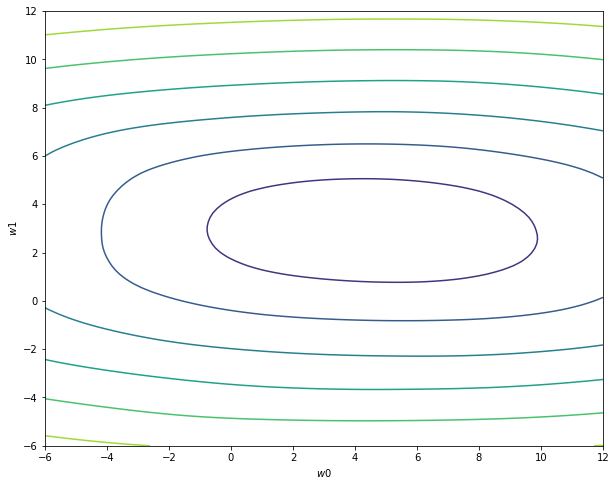

In [8]:
wn0 = np.linspace(-6, 12, 100)
wn1 = np.linspace(-6, 12, 100)
wwn0, wwn1 = np.meshgrid(wn0, wn1)
Wn = np.c_[wwn0.ravel(), wwn1.ravel()]
lossn = np.array([loss(w) for w in Wn]).reshape(wwn0.shape)

plt.figure(figsize=(10, 8))
plt.contour(wwn0, wwn1, lossn)
plt.xlabel(r"$w0$")
plt.ylabel(r"$w1$")
plt.show()

### 使用`Scipy`

In [9]:
from scipy import optimize

In [10]:
results = optimize.minimize(loss, x0=[0.1, 0.1], method='L-BFGS-B')
results

      fun: 998.3236272527068
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.54747351e-05, -1.02318154e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 9
   status: 0
  success: True
        x: array([4.43191835, 2.99444731])

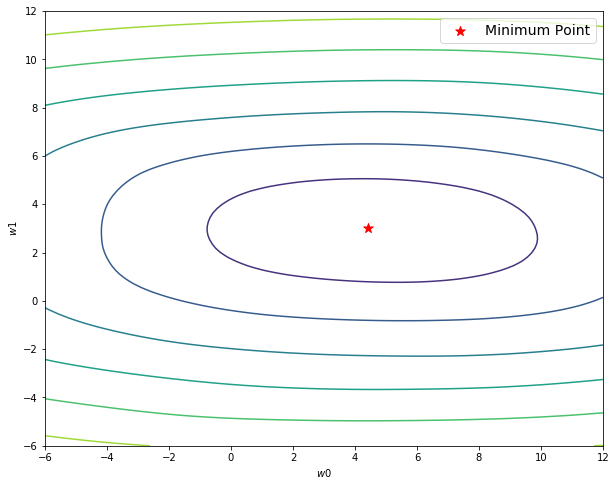

In [11]:
W = results.x

plt.figure(figsize=(10, 8))
plt.contour(wwn0, wwn1, lossn)
plt.scatter(W[0], W[1], color='r', marker='*', s=100, label="Minimum Point")
plt.legend(fontsize=14)
plt.xlabel(r"$w0$")
plt.ylabel(r"$w1$")
plt.show()

In [12]:
plt3d.figure(width=1000, height=500)
plt3d.plot_surface(wwn0, lossn, wwn1, color='green')
plt3d.scatter(np.array([W[0]]), np.array([loss(W)]), np.array([W[1]]),
              colors='r', size=5)
plt3d.xlabel("w0")
plt3d.zlabel("w1")
plt3d.ylabel("loss")
plt3d.show()

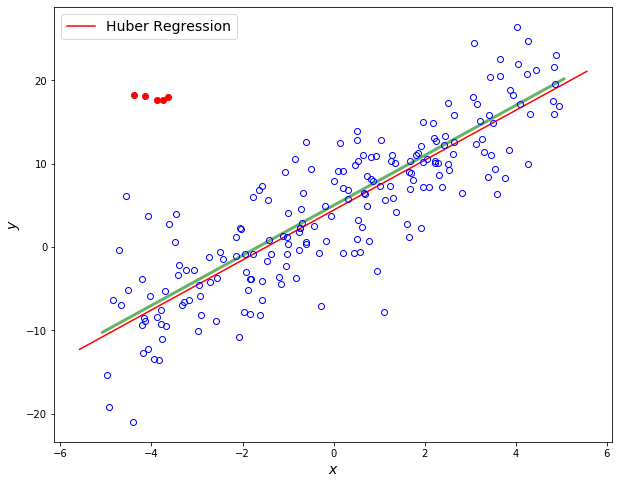

In [13]:
# 绘制拟合线
plt.figure(figsize=(10, 8))
plot_scatter(X, y, f=f_truth)
plt.scatter(outliers[:, 0], outliers[:, 1], color='r')
xn = np.linspace(plt.xlim()[0], plt.xlim()[1], 100)
yn = W[0] + W[1] * xn
plt.plot(xn, yn, "r", label="Huber Regression")
plt.legend(fontsize=14)
plt.show()